In [19]:
import matplotlib
import pandas as pd
from common.clustering import *
from common.outliers import find_outliers_in_multiple_columns
from common.standardization import standardize, de_standardize

matplotlib.rcParams['figure.figsize'] = [7, 7]

### Constants and settings

In [20]:
columns_used_for_clustering = ["User_Score", "Critic_Score", "EU_Sales", "NA_Sales", "JP_Sales", "Year_of_Release"]

### Load dataset from file
Please note that the `_preprocessed` file is required. To use this notebook
properly, please execute the preprocessing one first to generate proper dataset
file.

In [21]:
data = pd.read_excel("../data/games_sales_2016_preprocessed.xlsx", index_col=0)
data = data.filter(items=columns_used_for_clustering)

### Data preparation

In [22]:
# data stats
stats_to_compute = ["max", "min", "std", "mean", "median"]
columns_stats = data.agg({item: stats_to_compute for item in columns_used_for_clustering})

# standardization
standardize(data, columns_used_for_clustering, columns_stats)

# outliers detection
k_neighbours = 5
r_percentage = 0.02
outliers, non_outliers = find_outliers_in_multiple_columns(data, columns_used_for_clustering, k_neighbours, r_percentage)


## Clustering - analysis
Used variables:
 - Critic_Score
 - User_Score
 - EU_Sales
 - NA_Sales
 - JP_Sales
 - Year_of_Release

We use all numeric variables except Global_Sales.

### Silhouette score analysis
First, we perform clustering analysis using the **silhouette** coefficient, to get the optimal number of clusters.
This will take some time ...

Performing Silhouette score analysis ... 

Used method: K-Means
Score for 2 clusters 0.27034009314248586 (+-1.787154996224662e-05)
Score for 3 clusters 0.2430204114690988 (+-0.00028990611081647236)
Score for 4 clusters 0.21706373999194523 (+-0.0003252447495631846)
Score for 5 clusters 0.22846884013722593 (+-0.00018633620558236195)
Score for 6 clusters 0.23629499317075997 (+-6.868341551483334e-05)
Score for 7 clusters 0.22158447515756546 (+-0.00023991744209340553)
Score for 8 clusters 0.20829710800675755 (+-0.0007385609787557199)
Score for 9 clusters 0.217594111462227 (+-0.0011492349066234732)
Score for 10 clusters 0.21054782207307296 (+-0.00012043895616313958)
Score for 11 clusters 0.20878163047641612 (+-0.00012699275941853663)
Score for 12 clusters 0.20805473262508473 (+-0.0003431751902121149)
Score for 13 clusters 0.20359591837884497 (+-0.0034658448372929694)
Score for 14 clusters 0.20173567443730436 (+-0.0009511444555603445)
Score for 15 clusters 0.20274229589740192 (+-0.00205192397

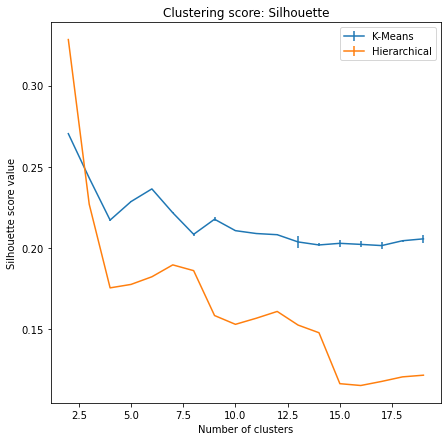

In [23]:
print("Performing Silhouette score analysis ... ")
numbers_of_clusters = range(2, 20)

print("\nUsed method: K-Means")
k_means_scores, k_means_errors = \
    perform_clustering_score_analysis(data, columns_used_for_clustering, numbers_of_clusters,
                                      k_means_multiple_dim_silhouette, outliers, 10)

print("\nUsed method: Hierarchical")
hierarchical_scores, hierarchical_errors = \
    perform_clustering_score_analysis(data, columns_used_for_clustering, numbers_of_clusters,
                                      hierarchical_multiple_dim_silhouette, outliers, 2)

scores = [k_means_scores, hierarchical_scores]
errors = [k_means_errors, hierarchical_errors]
methods = ["K-Means", "Hierarchical"]
plot_clustering_scores(numbers_of_clusters, scores, errors, methods, "Silhouette")

### Caliński-Harabasz score analysis
We also perform clustering analysis using different score calculating technique - **Calinski-Harabasz** score.
This will also take some time...

Performing Calinski-Harabasz score analysis ... 

Used method: K-Means
Score for 2 clusters 4285.829768341255 (+-0.05667962253189515)
Score for 3 clusters 3841.983503956975 (+-0.03361025828526222)
Score for 4 clusters 3393.8449498646123 (+-0.10494606436699516)
Score for 5 clusters 3218.195446459109 (+-0.0967037106100037)
Score for 6 clusters 3158.482043056799 (+-0.02266899290401646)
Score for 7 clusters 2996.7448116515375 (+-0.0302312949114026)
Score for 8 clusters 2861.887202496435 (+-0.2859478349374213)
Score for 9 clusters 2798.365669200277 (+-0.2574410978474772)
Score for 10 clusters 2719.6097337470183 (+-0.020014317781267124)
Score for 11 clusters 2641.5343217351315 (+-0.052128566261159894)
Score for 12 clusters 2538.2107638032826 (+-3.5657962041286266)
Score for 13 clusters 2444.8653653401166 (+-3.525043833955474)
Score for 14 clusters 2369.6970866892148 (+-2.1105209842464334)
Score for 15 clusters 2306.6914180984 (+-2.1247813625141045)
Score for 16 clusters 2253.1262698914516 (+

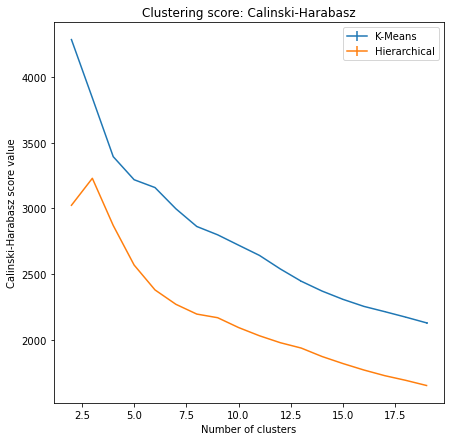

In [24]:
print("Performing Calinski-Harabasz score analysis ... ")
numbers_of_clusters = range(2, 20)

print("\nUsed method: K-Means")
k_means_scores, k_means_errors = \
    perform_clustering_score_analysis(data, columns_used_for_clustering, numbers_of_clusters,
                                      k_means_multiple_dim_calinski_harabasz, outliers, 10)

print("\nUsed method: Hierarchical")
hierarchical_scores, hierarchical_errors = \
    perform_clustering_score_analysis(data, columns_used_for_clustering, numbers_of_clusters,
                                      hierarchical_multiple_dim_calinski_harabasz, outliers, 2)

scores = [k_means_scores, hierarchical_scores]
errors = [k_means_errors, hierarchical_errors]
methods = ["K-Means", "Hierarchical"]
plot_clustering_scores(numbers_of_clusters, scores, errors, methods, "Calinski-Harabasz")

### Perform clustering using hierarchical method

In [25]:
number_of_clusters = 2
data_without_outliers = drop_outliers_from_dataset(data, outliers)
clustered_data = hierarchical_clustering(data_without_outliers, columns_used_for_clustering, number_of_clusters)
de_standardize(clustered_data, columns_used_for_clustering, columns_stats)

print("Cluster 0 count: {}".format(clustered_data[clustered_data["cluster"] == 0].shape[0]))
print("Cluster 1 count: {}".format(clustered_data[clustered_data["cluster"] == 1].shape[0]))

Cluster 0 count: 8848
Cluster 1 count: 1395


### Plot results of hierarchical clustering

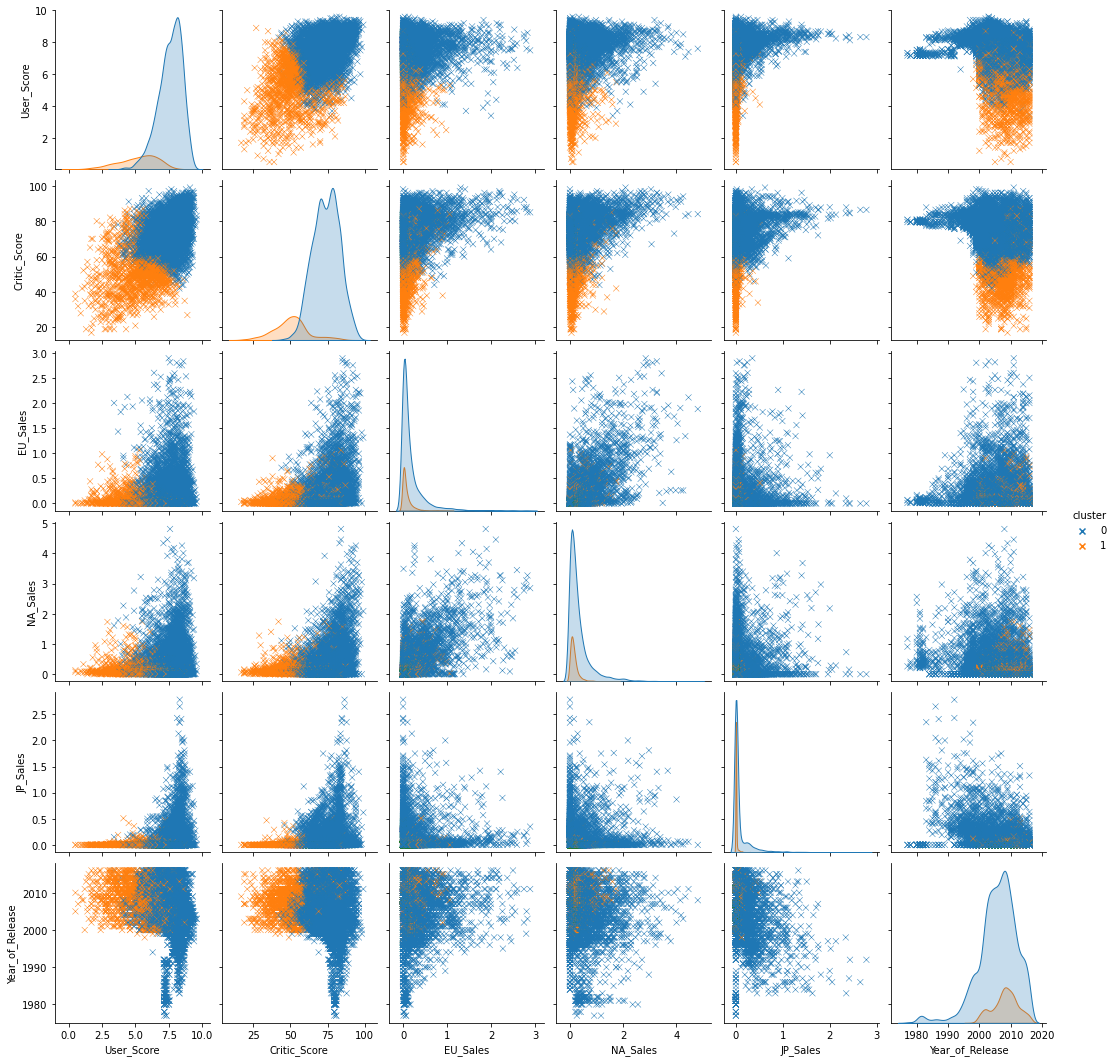

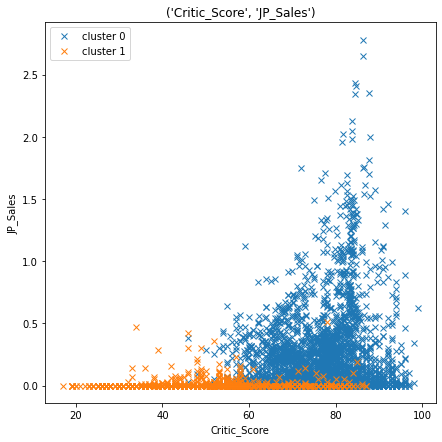

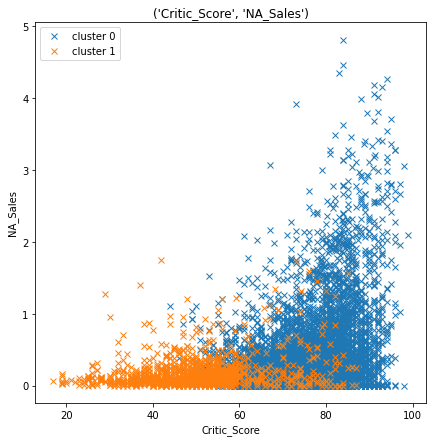

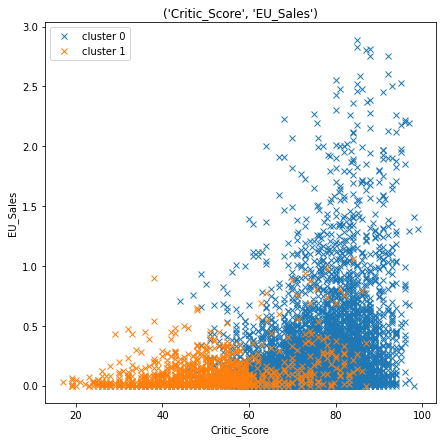

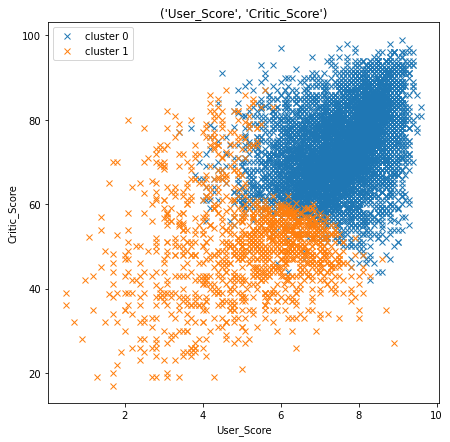

In [26]:
sns.pairplot(data=clustered_data, hue="cluster", markers=['x', 'x'])
plot_2d_data_with_clusters(clustered_data, ("Critic_Score", "JP_Sales"))
plot_2d_data_with_clusters(clustered_data, ("Critic_Score", "NA_Sales"))
plot_2d_data_with_clusters(clustered_data, ("Critic_Score", "EU_Sales"))
plot_2d_data_with_clusters(clustered_data, ("User_Score", "Critic_Score"))

### Plot dendrogram for hierarchical clustering

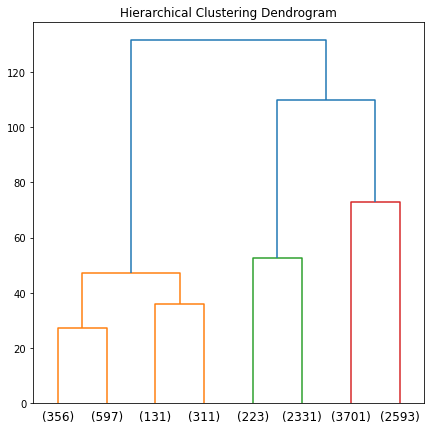

In [27]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(data_without_outliers)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram_for_hierarchical_clustering(model, truncate_mode='level', p=2)
